In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, bisect

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### all about the inequality for the rho solution (both when pi=0 (so Iacopini19) or pi != 0)

In [2]:
def l2_line_pi0(l1):
    return 2 - l1 + 2*np.sqrt(1-l1), 2 - l1 - 2*np.sqrt(1-l1)

def ineq_function(l2, l1):
    return l2**2 + l2 * (2*l1 - 4) + l1**2

def rho_sol(l1, l2):
    term1 = 1/2 * (1 - l1/l2)
    term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)
    return term1 + term2, term1 - term2

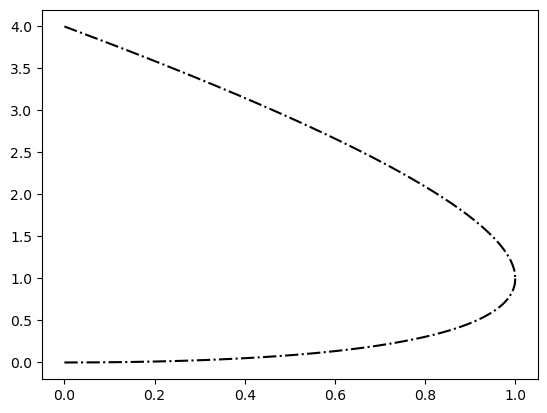

In [42]:
l1s = np.arange(0.0, 1.001, 0.001)
fig, ax = plt.subplots()
ax.plot(l1s, l2_line_pi0(l1s)[0], ls='-.', color='xkcd:black')
ax.plot(l1s, l2_line_pi0(l1s)[1], ls='-.', color='xkcd:black')

In [9]:
l1, l2 = 0.8, 0.01
l1, l2 = 1.0001, 0.5
print(ineq_function(l2, l1))
print(rho_sol(l1, l2))

0.2503000099999999
(0.00019992004796498541, -1.000399920047965)


### ... and now the inequality for the m solution, when pi != 0

In [92]:
def m_sol(rho, l2, pi):
    return np.sqrt(rho**2 - 4*pi/l2)

def pi_thresh_m_neq_0_sol(l2, l1):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3, term1 + term2 - term3

# equation to send to the root finder
def eq_isoline(l2, l1, pi, sign):
    lambda_func = pi_thresh_m_neq_0_sol(l1, l2)
    return lambda_func[sign] - pi

def eq_isoline_rho_plus(l2, l1, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3 - pi

def eq_isoline_rho_minus(l2, l1, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 - term3 - pi

def thresh_line_m_rho_plus(l1s, pi):
    b_bisec = 10.0
    sols = []
    for l1 in l1s:
        if l1 < 1:
            a_bisec = l2_line_pi0(l1)[0]
        else:
            a_bisec = 1e-7
        try:
            sol, r = bisect(eq_isoline_rho_plus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

def thresh_line_m_rho_minus(l1s, pi):
    # for the moment i'm only interested in the lines in the region l1<1, so this function is pretty much the same as for rho_plus
    b_bisec = 10.0
    sols = []
    for l1 in l1s:
        if l1 < 1:
            a_bisec = l2_line_pi0(l1)[0]
        else:
            a_bisec = 1e-7
        try:
            sol, r = bisect(eq_isoline_rho_minus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

### threshold line for the rho_plus, m solution

In [ ]:
l1s = np.arange(0.0, 2.05, 0.05)
pi = 0.1

sols = thresh_line_m_rho_plus(l1s, pi)

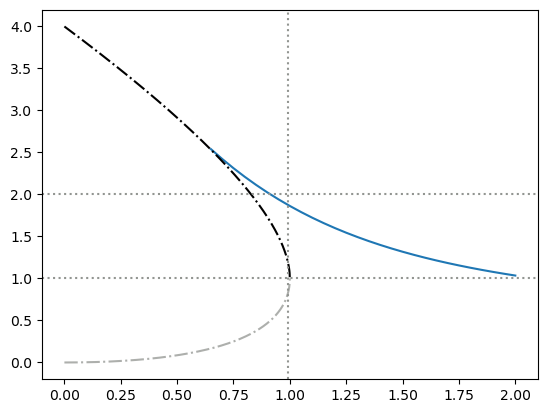

In [ ]:
fig, ax = plt.subplots()
ax.plot(l1s, sols)

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
# ax.axhline(2.0, 0, 1, ls=':', color='xkcd:gray')
# ax.axvline(0.99, 0, 1, ls=':', color='xkcd:gray')

# the point 

In [42]:
pi = 0.1
l1, l2 = 0.25, 3.8
# l1, l2 = 0.99, 1.6
l1, l2 = 1.25, 1.1
rho = rho_sol(l1, l2)[1]
print(rho, m_sol(rho, l2, pi))

-0.5497640931912975 nan


/tmp/ipykernel_32640/3626171910.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(rho**2 - 4*pi/l2)


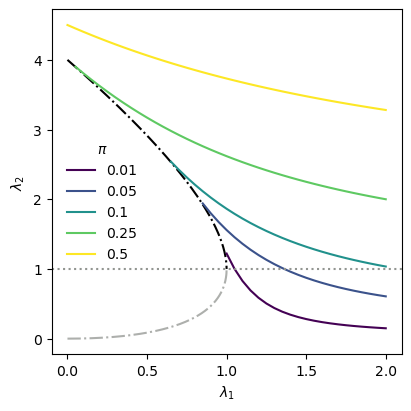

In [89]:
### let's do many pi for the rho_plus solution:

l1s = np.arange(0.0, 2.05, 0.05)
pis = [0.01, 0.05, 0.1, 0.25, 0.5]
pi_colors = plt.cm.viridis(np.linspace(0,1,len(pis)))

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)

for pi,pi_c in zip(pis,pi_colors):
    sols = thresh_line_m_rho_plus(l1s, pi)
    ax.plot(l1s, sols, label=pi, color=pi_c)

fig.legend(title=r'$\pi$', frameon=False, ncol=1, loc=(0.15,0.35))
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
fig.savefig(f'sol_rho_plus_m_thresh_lines_many_pi_space_l1_l2.png')

### and for the rho minus solution:

In [71]:
l1s = np.arange(0.0, 2.05, 0.05)
pi, sign = 0.1, 0

sols = []
b_bisec = 10.0

for l1 in l1s:
    if l1 < 1:
        a_bisec = l2_line_pi0(l1)[0]
    else:
        a_bisec = 1e-7
    try:
        sol, r = bisect(eq_isoline_rho_minus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
    except ValueError:
        sol = float('nan')
    except RuntimeError:
        sol = float('nan')
    sols.append(sol)

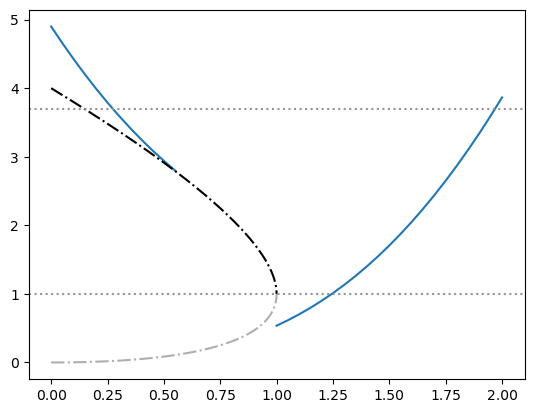

In [72]:
fig, ax = plt.subplots()
ax.plot(l1s, sols)

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
ax.axhline(3.7, 0, 1, ls=':', color='xkcd:gray')

In [91]:
pi = 0.1
l1, l2 = 0.25, 3.7
# l1, l2 = 1.25, 2.0
rho = rho_sol(l1, l2)[1]
print(rho, m_sol(rho, l2, pi))

0.3451589671137235 0.10500764005968495


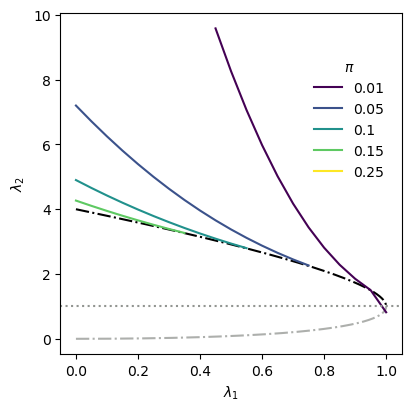

In [96]:
### let's do many pi for the rho_plus solution:

l1s = np.arange(0.0, 1.05, 0.05)
pis = [0.01, 0.05, 0.1, 0.15, 0.25]
pi_colors = plt.cm.viridis(np.linspace(0,1,len(pis)))

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)

for pi,pi_c in zip(pis,pi_colors):
    sols = thresh_line_m_rho_minus(l1s, pi)
    ax.plot(l1s, sols, label=pi, color=pi_c)

fig.legend(title=r'$\pi$', frameon=False, ncol=1, loc=(0.75,0.55))
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
fig.savefig(f'sol_rho_minus_m_thresh_lines_many_pi_space_l1_l2.png')

#### is the rho minus solution ever positive somewhere?

In [65]:
l1s = np.linspace(0.001, 2, 1000)
l2s = np.linspace(0.001, 10, 1000)
l1grid, l2grid = np.meshgrid(l1s,l2s)
rho_min_grid = rho_sol(l1s[:,None], l2s[None,:])[1]


/tmp/ipykernel_32640/348324677.py:9: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)


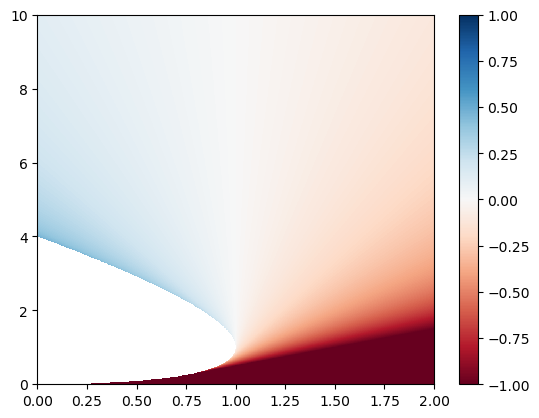

In [66]:
fig, ax = plt.subplots()
im = ax.pcolormesh(l1grid, l2grid, rho_min_grid.T, cmap='RdBu', vmin=-1, vmax=1, shading='nearest')
fig.colorbar(im, ax=ax)

### using the contour function:

In [19]:
def plotter(f, c):
    x = np.linspace(0.001, 2, 1000)
    y = np.linspace(0.001, 10, 1000)
    X, Y = np.meshgrid(x,y)
    Z1, Z2 = pi_thresh_m_neq_0_sol(X,Y)
    fig, ax = plt.subplots(1,1,figsize=(4,4), constrained_layout=True)
    ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')
    cs = ax.contour(X,Y,Z1, levels=[c], colors='xkcd:red')
    cs = ax.contour(X,Y,Z2, levels=[c], colors='xkcd:blue')
    ax.plot(x, l2_line_pi0(x), color='xkcd:black', ls='-.')
    fig.savefig(f'pi_thresh_contour_lines_space_l1_l2_pi_{c}.png')

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:4: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 2-l1+2*np.sqrt(1-l1)


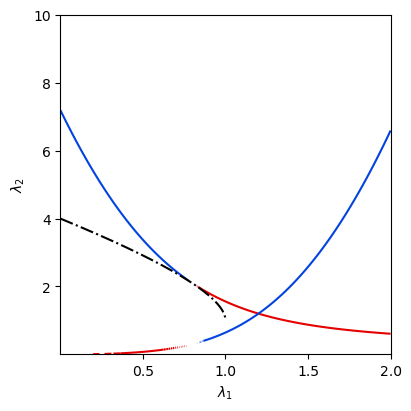

In [20]:
pi = 0.05
plotter(pi_thresh_m_neq_0_sol, pi)